In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [3]:
#import in our csv as a dataframe
#dataset can be downloaded from https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents and extracted into project directory
df = pd.read_csv("US_Accidents_Dec21_updated.csv")

In [9]:
#initial look at the data
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [11]:
df.iloc[0].to_csv('1_col.csv')

In [12]:
#quick look at the quantitative data
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [20]:
#check nulls
df.isnull().sum().sort_values(ascending=False).head(25)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
dtype: int64

In [17]:
#check weather_condition values where precip is null
df[df["Precipitation(in)"].isnull()]["Weather_Condition"].value_counts().sort_values(ascending=False).head(10)

Clear               172786
Overcast             72357
Mostly Cloudy        72029
Partly Cloudy        51271
Fair                 45103
Scattered Clouds     44052
Cloudy                8959
Haze                  6675
Light Rain            3908
Fog                   3230
Name: Weather_Condition, dtype: int64

In [16]:
#check weather_condition values where wind speed is null
df[df["Wind_Speed(mph)"].isnull()]["Weather_Condition"].value_counts().sort_values(ascending=False).head(10)

Clear               37935
Overcast            13077
Fair                10204
Mostly Cloudy        9383
Partly Cloudy        6630
Scattered Clouds     5615
Light Rain           3157
Cloudy               2288
Haze                 1994
Light Snow           1514
Name: Weather_Condition, dtype: int64

In [22]:
#both of the above seem like the value is just 0. imputing this
df.loc[df['Wind_Speed(mph)'].isnull(), 'Wind_Speed(mph)'] = 0 
df.loc[df["Precipitation(in)"].isnull(), "Precipitation(in)"] = 0

In [23]:
df["Weather_Condition"].isnull().sum() / df.shape[0]

0.02482513525614847

In [26]:
df.dropna(subset=["Weather_Condition"], inplace=True)

In [27]:
#now check nulls again
df.isnull().sum().sort_values(ascending=False).head(25)

Number                   1697490
Wind_Chill(F)             406544
Wind_Direction             17505
Humidity(%)                15183
Temperature(F)             11412
Visibility(mi)              7268
Pressure(in)                3594
Nautical_Twilight           2256
Civil_Twilight              2256
Sunrise_Sunset              2256
Astronomical_Twilight       2256
City                         131
Street                         1
Station                        0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway                        0
Roundabout                     0
Stop                           0
Amenity                        0
Traffic_Calming                0
Traffic_Signal                 0
Turning_Loop                   0
dtype: int64

I think a fun experiment with this dataset would be predicting the end time of the accident.
The utility this would provide would be allowing for accident information on route planning in the near future.
When planning trips to different cities/states, it can be helpful to preview an hour or so before leaving with a specified departure time and see a forecast of accident information.

##### Data Cleaning / Creating Features

In [28]:
def to_datetime(row):
    '''
    returns datetime object of Start_Time value in given row
    '''
    format_t = "%Y-%m-%d %H:%M:%S"

    if len(row["Start_Time"]) == 19:
        dt = datetime.strptime(row["Start_Time"], format_t)
    
    elif len(row["Start_Time"]) == 26:
        dt = datetime.strptime(row["Start_Time"][:-7], format_t)
    
    elif len(row["Start_Time"]) == 29:
        dt = datetime.strptime(row["Start_Time"][:-10], format_t)
    
    return dt

In [29]:
def time_diff(row):
    '''
    Inputs:
    row - dataframe row containing "End_Time" and "Start_Time" columns with strings containing datetime information
    
    Outputs:
    diff (float) - new value that is difference between start & end, expressed in minutes
    
    accounts for diff length/spots after decimal
    2016-02-08 00:37:08
    2021-11-11 19:36:30.000000000
    2021-10-23 15:50:00.000000
    '''
    format_t = "%Y-%m-%d %H:%M:%S"
    
    if len(row["End_Time"]) == 19:
        diff = (datetime.strptime(row["End_Time"], format_t) - datetime.strptime(row["Start_Time"], format_t))
    
    elif len(row["End_Time"]) == 26:
        diff = (datetime.strptime(row["End_Time"][:-7], format_t) - datetime.strptime(row["Start_Time"][:-7], format_t))
    
    elif len(row["End_Time"]) == 29:
        diff = (datetime.strptime(row["End_Time"][:-10], format_t) - datetime.strptime(row["Start_Time"][:-10], format_t))

    diff = diff.total_seconds() / 60
    
    return diff

In [30]:
#create new column from above function
df["duration(min)"] = df.apply(lambda row: time_diff(row), axis=1)

In [33]:
df["duration(min)"].value_counts().head(20)

360.000000    343307
240.000000     54464
15.000000      36366
30.000000      34581
60.000000      27902
75.000000      25449
105.000000     24223
45.000000      18323
120.000000     16202
20.000000      12749
34.966667      11118
75.016667      10727
59.000000       7617
49.966667       6059
20.500000       5667
165.000000      5525
78.016667       5039
21.000000       4728
29.500000       4239
64.966667       4206
Name: duration(min), dtype: int64

In [32]:
df["duration(min)"].describe()

count    2.774706e+06
mean     3.543284e+02
std      9.216739e+03
min      2.000000e+00
25%      7.375000e+01
50%      1.200000e+02
75%      2.237000e+02
max      1.682579e+06
Name: duration(min), dtype: float64

In [41]:
#high amount of values are at 360mins exactly - likely a default time
#will this have an effect on our regression?

#cutting off any rows where duration is over duration threshold & exactly equal to 360
duration_threshold = 60 * 24 # mins in 1 day
mask = (df["duration(min)"] != 360.0) & (df["duration(min)"] < duration_threshold)
df = df[mask]

<AxesSubplot: xlabel='duration(min)', ylabel='Count'>

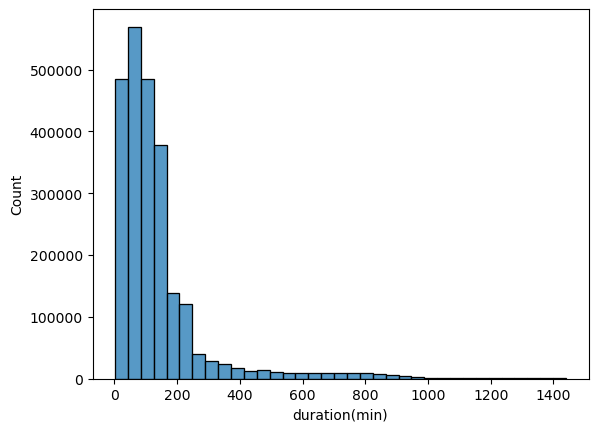

In [42]:
sns.histplot(df["duration(min)"],bins=35)
#plt.savefig(('static/' + 'duration_hist' + '.png'),bbox_inches="tight")

In [11]:
#check where cols are null
df.isnull().sum().sort_values(ascending=False)

Number                   1449057
Precipitation(in)         238336
Wind_Chill(F)             173828
Wind_Speed(mph)            96385
Wind_Direction             68896
Humidity(%)                64046
Temperature(F)             60637
Visibility(mi)             60462
Weather_Condition          60439
Pressure(in)               51674
Weather_Timestamp          46163
Airport_Code                8850
Timezone                    3311
Sunrise_Sunset              2723
Civil_Twilight              2723
Nautical_Twilight           2723
Astronomical_Twilight       2723
Zipcode                     1063
City                         108
Street                         2
Junction                       0
Railway                        0
No_Exit                        0
Crossing                       0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Traffic_Signal                 0
Turning_Loop                   0
Give_Way  

In [63]:
#create time_of_incident col
df["Time_of_Incident"] = df.apply(lambda row: to_datetime(row), axis=1)

In [64]:
#create column of day of week to get dummies for
df["Day"] = df.apply(lambda row: row.Time_of_Incident.day_name(), axis=1)

In [65]:
#same for hour of the day
df["Hour"] = df.apply(lambda row: row.Time_of_Incident.hour, axis=1)

In [44]:
len(df["Weather_Condition"].unique())

117

In [46]:
df["Weather_Condition"].value_counts().sort_values(ascending=False).head(25)

Fair                       1095690
Cloudy                      344926
Mostly Cloudy               310864
Partly Cloudy               213764
Light Rain                  111852
Clear                        46329
Fog                          39659
Light Snow                   37945
Haze                         32617
Overcast                     29347
Rain                         27171
Fair / Windy                 14928
Scattered Clouds             10620
Heavy Rain                   10520
Thunder in the Vicinity       6901
Smoke                         6711
Cloudy / Windy                6705
T-Storm                       6512
Mostly Cloudy / Windy         6216
Thunder                       5986
Light Drizzle                 5969
Light Rain with Thunder       5247
Snow                          4521
Partly Cloudy / Windy         3810
Wintry Mix                    3794
Name: Weather_Condition, dtype: int64

In [47]:
#create new weather column that narrows possible values
def narrow_weather(row):
    #define keywords to categorize by
    keywords = {
        "rain" : "rain",
        "storm" : "storm",
        "drizzle" : "rain",
        "snow" : "snow",
        "sleet" : "snow",
        "fair" : "fair",
        "clear" : "fair",
        "windy" : "windy",
        "fog" : "fog",
        "haze" : "fog",
        "hail" : "hail",
        "thunder" : "storm",
        "overcast" : "cloudy",
        "cloud" : "cloudy",
        "wintry" : "snow",
        "drizzle" : "rain",
        "mist" : "fog",
        "smoke" : "smoke",
        "shower" : "rain",
        "precipitation" : "rain",
        "dust" : "dust",
        "ice" : "hail",
        "sand" : "dust",
        "squall" : "storm",
    }
    
    entry = np.nan
    for k, v in keywords.items():
        if k in row["Weather_Condition"].lower():
            entry = v

    return entry

In [48]:
#drop weather NaN values before running func
df = df.dropna(subset=["Weather_Condition"])
df["weather"] = df.apply(lambda row: narrow_weather(row), axis=1)

In [49]:
df["weather"].unique()

array(['cloudy', 'fair', 'rain', 'fog', 'snow', 'storm', 'smoke', 'windy',
       'dust', nan, 'hail'], dtype=object)

In [19]:
#replace N/A precipitation with 0, since most are for clear/overcast weather
#there is potential that precipitation is 0 but also wet/snowy conditions, 
#so will not drop those values unless it clearly poorly affects model later.
df["Precipitation(in)"].fillna(value=0.0, inplace=True)

In [20]:
assert df[df["Precipitation(in)"].isna()]["weather"].value_counts().shape[0] == 0

In [60]:
#dropping where temp, weather & visibility are null.
df = df.dropna(subset=["Visibility(mi)", "Temperature(F)", "weather"])

In [66]:
#checking where sunrise sunset is null hour values, out of curiosity
df[df["Sunrise_Sunset"].isnull()]["Hour"].value_counts()

Series([], Name: Hour, dtype: int64)

In [67]:
#no real distribution, lines up with common driving hours. dropping
df = df.dropna(subset=["Sunrise_Sunset"])

In [68]:
#how many entries do we still have?
df.shape[0]

2394420

In [25]:
df["Wind_Speed(mph)"].describe()

count    2.353551e+06
mean     7.177552e+00
std      5.489298e+00
min      0.000000e+00
25%      3.000000e+00
50%      7.000000e+00
75%      1.000000e+01
max      1.087000e+03
Name: Wind_Speed(mph), dtype: float64

In [52]:
df["Wind_Speed(mph)"].sort_values(ascending=False).head(10)

1486460    1087.0
2225067     984.0
710258      812.0
2311806     518.0
2311795     518.0
1414359     243.0
2104007     232.0
1955910     211.0
1417386     186.0
1224096     186.0
Name: Wind_Speed(mph), dtype: float64

In [54]:
df[df["Wind_Speed(mph)"] > 75].shape[0]

61

In [55]:
#drop where wind speed is NaN & higher than 75mph
df = df.dropna(subset=["Wind_Speed(mph)"])
df = df[df["Wind_Speed(mph)"] <= 75]

<AxesSubplot: xlabel='Wind_Speed(mph)', ylabel='Count'>

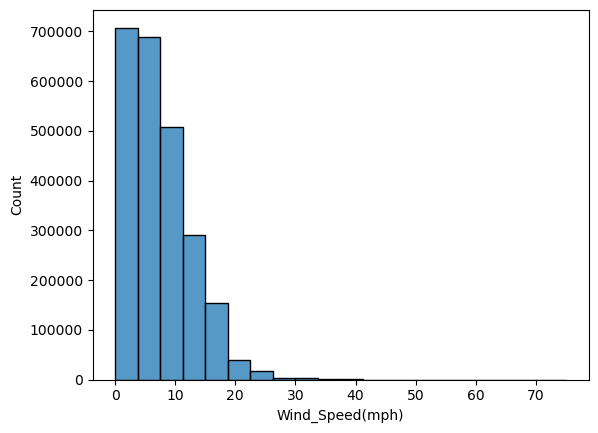

In [57]:
sns.histplot(df["Wind_Speed(mph)"],bins=20)

In [81]:
#what is the max value for temp and visibility?
df[["Temperature(F)","Visibility(mi)"]].describe()

,Temperature(F),Visibility(mi)
count,2.394420e+06,2.394420e+06
mean,6.167240e+01,9.068610e+00
std,1.855222e+01,2.656350e+00
min,-8.900000e+01,0.000000e+00
25%,5.000000e+01,1.000000e+01
50%,6.300000e+01,1.000000e+01
75%,7.600000e+01,1.000000e+01
max,1.960000e+02,1.400000e+02


In [82]:
df[df["Temperature(F)"] > 120].shape[0]

8

In [102]:
#only keep cols we want now
features = ["Temperature(F)", "Visibility(mi)", "Wind_Speed(mph)",
"Precipitation(in)", "weather", "Sunrise_Sunset", "Day", "Hour"]
val_to_predict = ["duration(min)"]


all_categoricals = ['Amenity',
    'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
    'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
    'Turning_Loop']

#df = df[features+val_to_predict]

In [69]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1401421
Street                         1
Side                           0
City                           0
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp              0
Temperature(F)                 0
Wind_Chill(F)             110204
Humidity(%)                 3344
Pressure(in)                1854
Visibility(mi)                 0
Wind_Direction             14957
Wind_Speed(mph)                0
Precipitation(in)              0
Weather_Condition              0
Amenity   

In [77]:
#return highest correlation features
df.corr(numeric_only=True)["duration(min)"].abs().sort_values(ascending=False)

duration(min)        1.000000
Hour                 0.106259
Distance(mi)         0.079753
Severity             0.059988
End_Lat              0.051920
Start_Lat            0.051916
Junction             0.051709
Station              0.044890
Traffic_Signal       0.043059
Pressure(in)         0.034518
Temperature(F)       0.031535
Number               0.028719
Humidity(%)          0.027520
Wind_Chill(F)        0.026542
Crossing             0.017282
Precipitation(in)    0.011894
End_Lng              0.011672
Start_Lng            0.011655
Amenity              0.009659
Visibility(mi)       0.005732
Wind_Speed(mph)      0.003740
No_Exit              0.003130
Stop                 0.002897
Give_Way             0.002889
Railway              0.002466
Bump                 0.002106
Traffic_Calming      0.001607
Roundabout           0.000793
Turning_Loop              NaN
Name: duration(min), dtype: float64

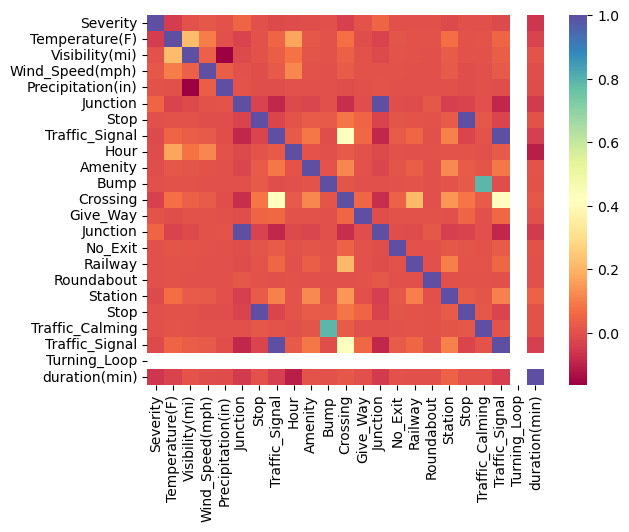

In [72]:
corr = sns.heatmap(df[features+all_categoricals+val_to_predict].corr(numeric_only=True),cmap="Spectral")
fig = corr.get_figure()
fig.savefig('static/corr_mat2.png', bbox_inches="tight")

<AxesSubplot: xlabel='Start_Lng', ylabel='Start_Lat'>

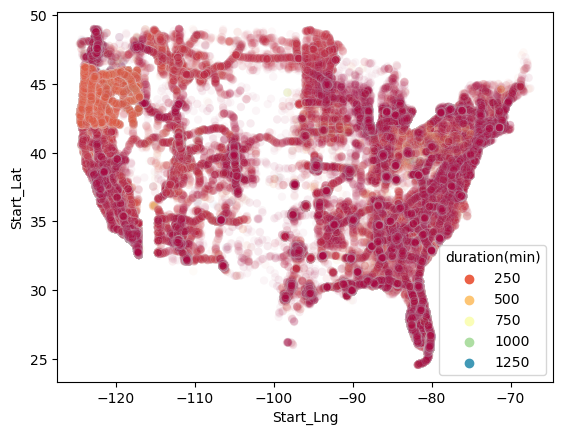

In [88]:
#it seems like latitude matters. lets plot our lat/lon and durations!
sns.scatterplot(data=df, x="Start_Lng", y="Start_Lat", hue="duration(min)", alpha=0.04, palette="Spectral")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'OH'),
  Text(1, 0, 'PA'),
  Text(2, 0, 'IN'),
  Text(3, 0, 'KY'),
  Text(4, 0, 'WV'),
  Text(5, 0, 'CA'),
  Text(6, 0, 'CO'),
  Text(7, 0, 'IA'),
  Text(8, 0, 'MN'),
  Text(9, 0, 'TX'),
  Text(10, 0, 'MO'),
  Text(11, 0, 'OK'),
  Text(12, 0, 'LA'),
  Text(13, 0, 'KS'),
  Text(14, 0, 'NE'),
  Text(15, 0, 'MS'),
  Text(16, 0, 'AR'),
  Text(17, 0, 'WI'),
  Text(18, 0, 'IL'),
  Text(19, 0, 'VA'),
  Text(20, 0, 'RI'),
  Text(21, 0, 'FL'),
  Text(22, 0, 'MD'),
  Text(23, 0, 'GA'),
  Text(24, 0, 'TN'),
  Text(25, 0, 'NY'),
  Text(26, 0, 'NC'),
  Text(27, 0, 'CT'),
  Text(28, 0, 'NJ'),
  Text(29, 0, 'MI'),
  Text(30, 0, 'NH'),
  Text(31, 0, 'ME'),
  Text(32, 0, 'SC'),
  Text(33, 0, 'DE'),
  Text(34, 0, 'MA'),
  Text(35, 0, 'AZ'),
  Text(36, 0, 'UT'),
  Text(37, 

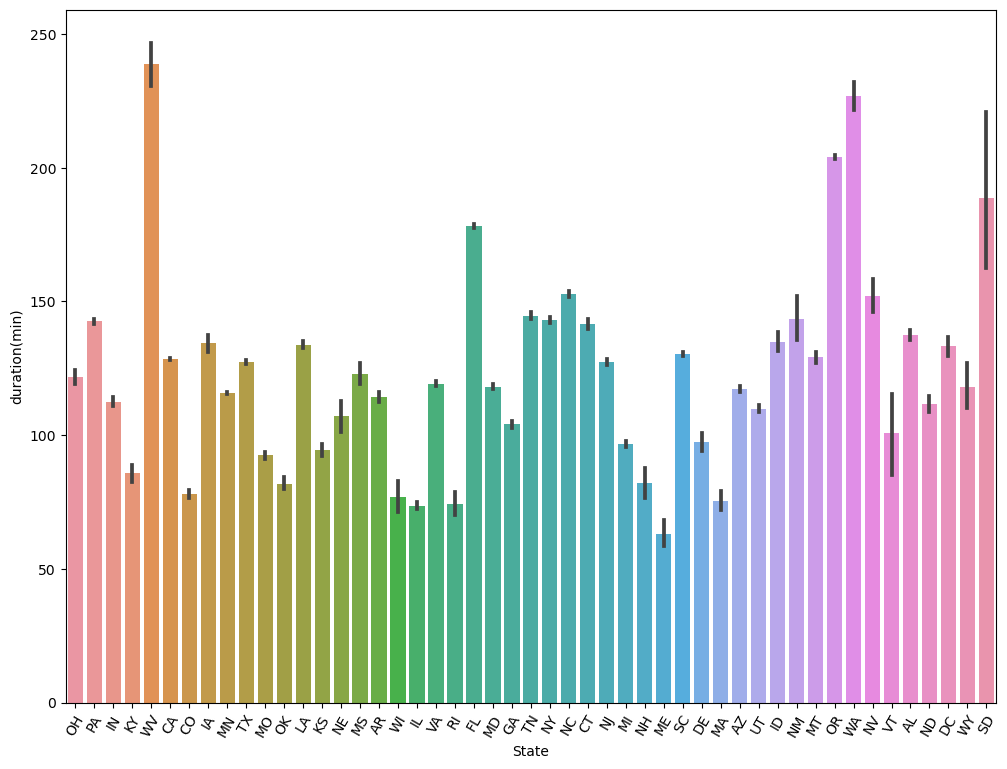

In [91]:
#state likely matters more than latitude, lets check mean duration by state
plt.rcParams['figure.figsize'] = [12, 9]
sns.barplot(data=df, x="State", y="duration(min)")
plt.xticks(rotation=60)

In [97]:
#lets ordinally encode state column and re-run df.corr() to see how heavily state matters

#compute mean
mean_duration = df.groupby('State')["duration(min)"].mean()

#order above by mean duration
mean_duration = mean_duration.sort_values(ascending=True)
states_ordered = mean_duration.index

#new column in dataframe mapped from states_ordered
df["state_ordered"] = df["State"].map(lambda x: states_ordered.get_loc(x))

In [100]:
#return highest correlation features
df.corr(numeric_only=True)["duration(min)"].abs().sort_values(ascending=False).head(5)

duration(min)    1.000000
state_ordered    0.173288
Hour             0.106259
Distance(mi)     0.079753
Severity         0.059988
Name: duration(min), dtype: float64

In [103]:
#update features list to include new state column
features.append("state_ordered")

['Temperature(F)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'weather',
 'Sunrise_Sunset',
 'Day',
 'Hour',
 'state_ordered']

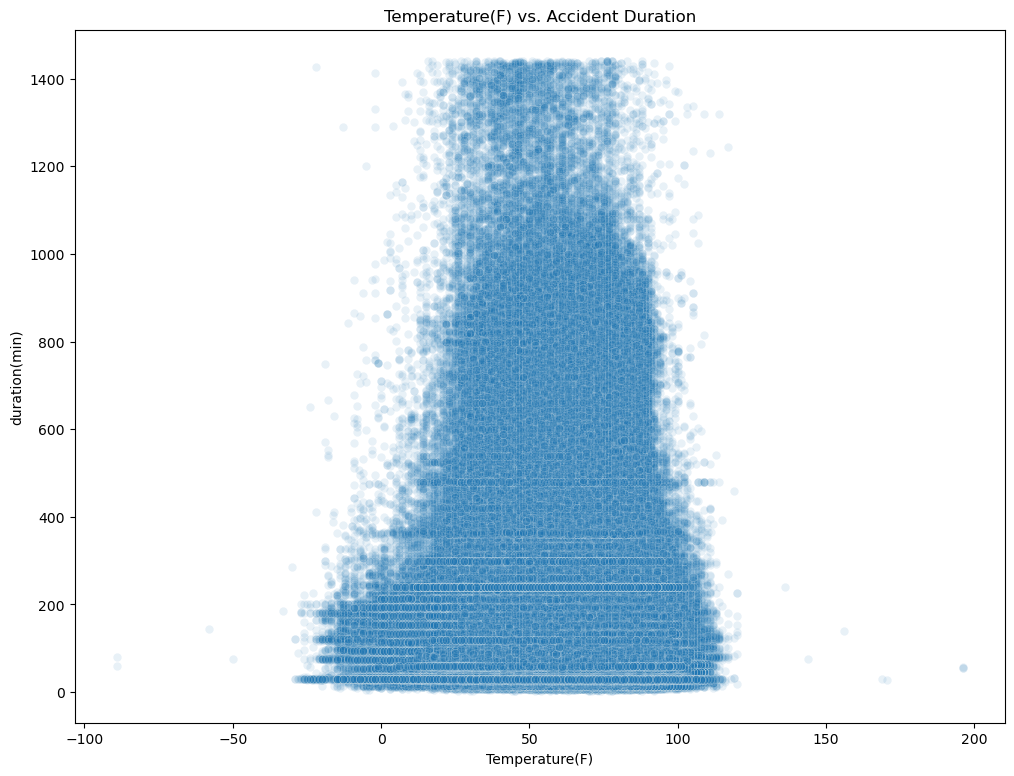

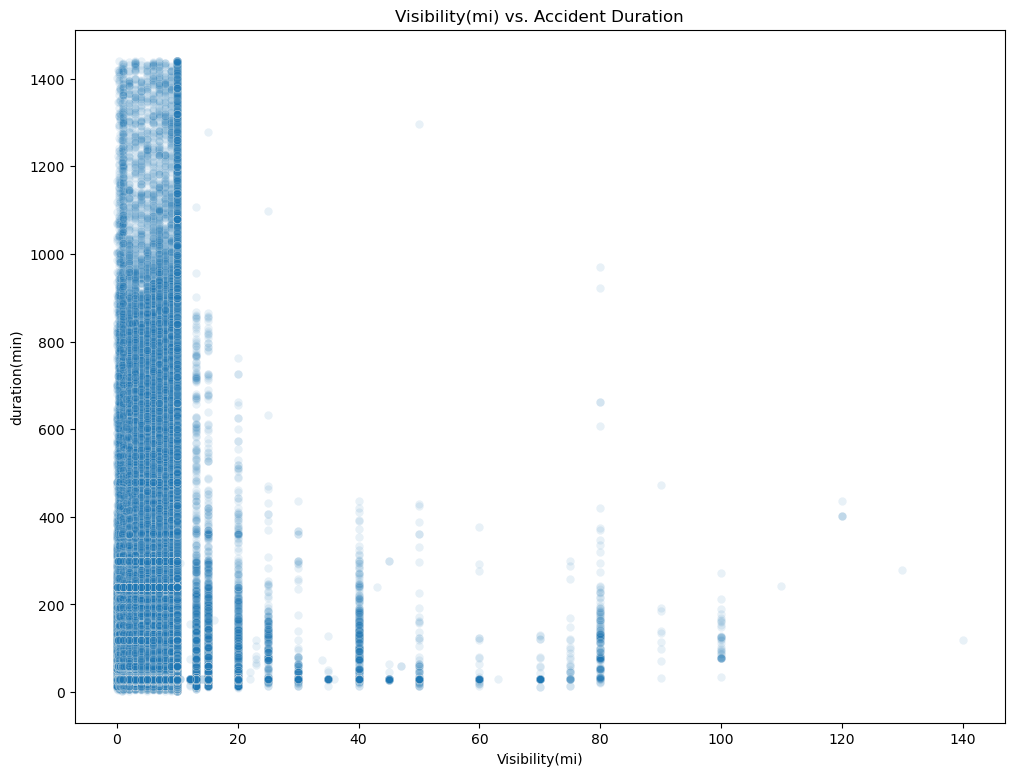

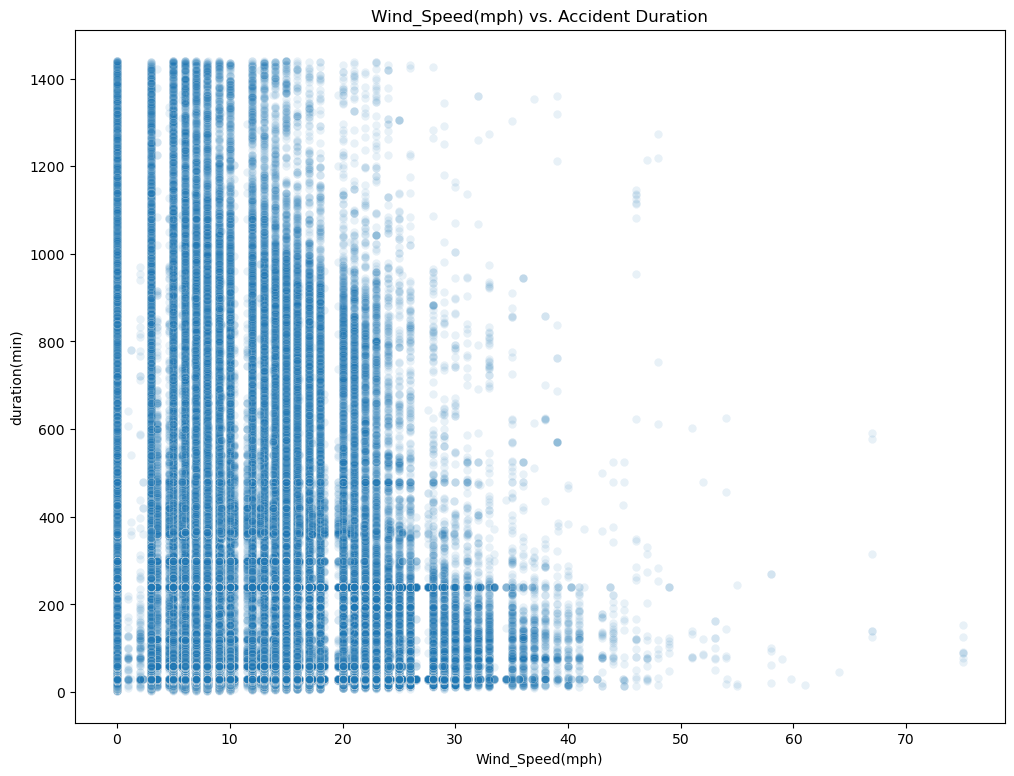

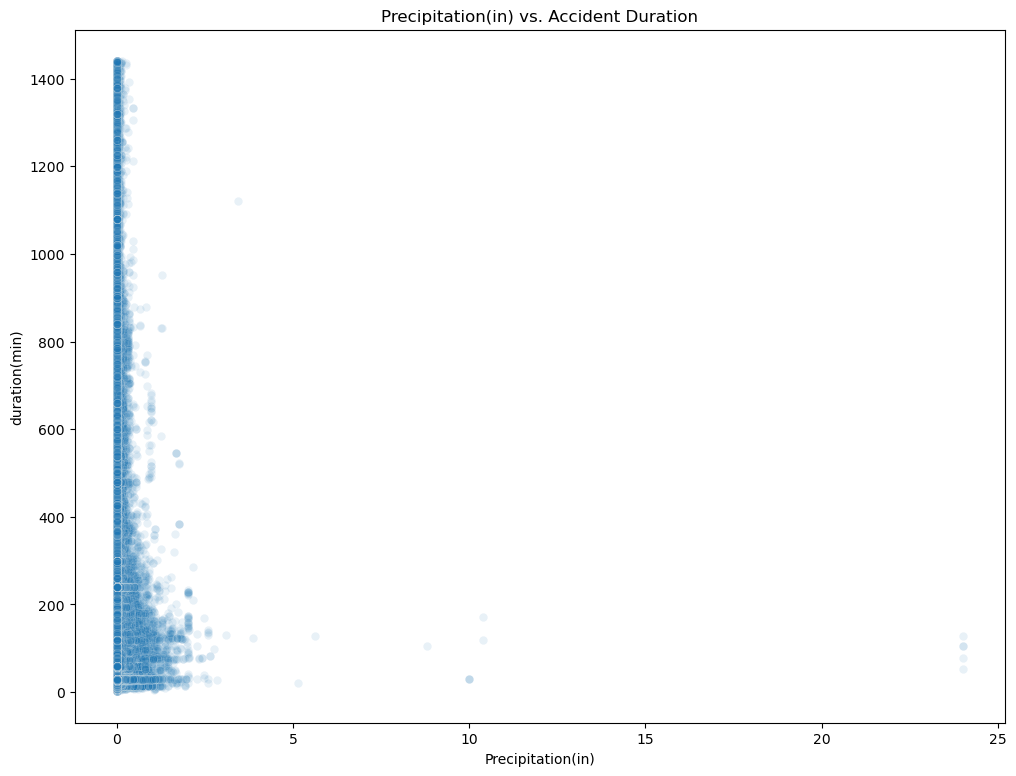

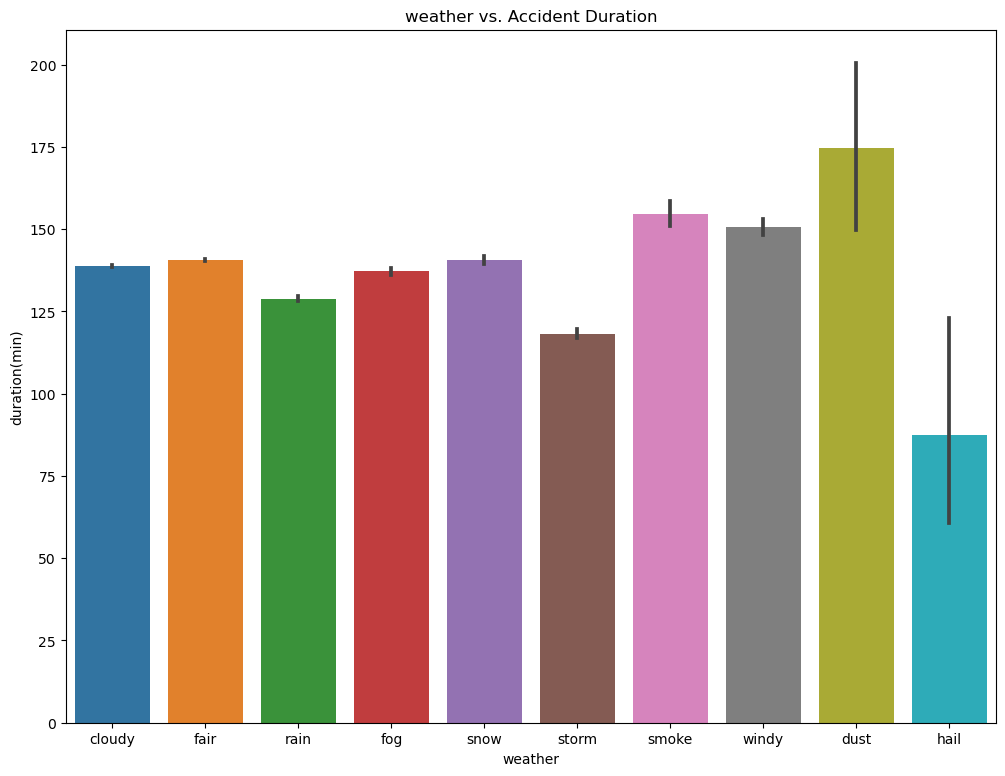

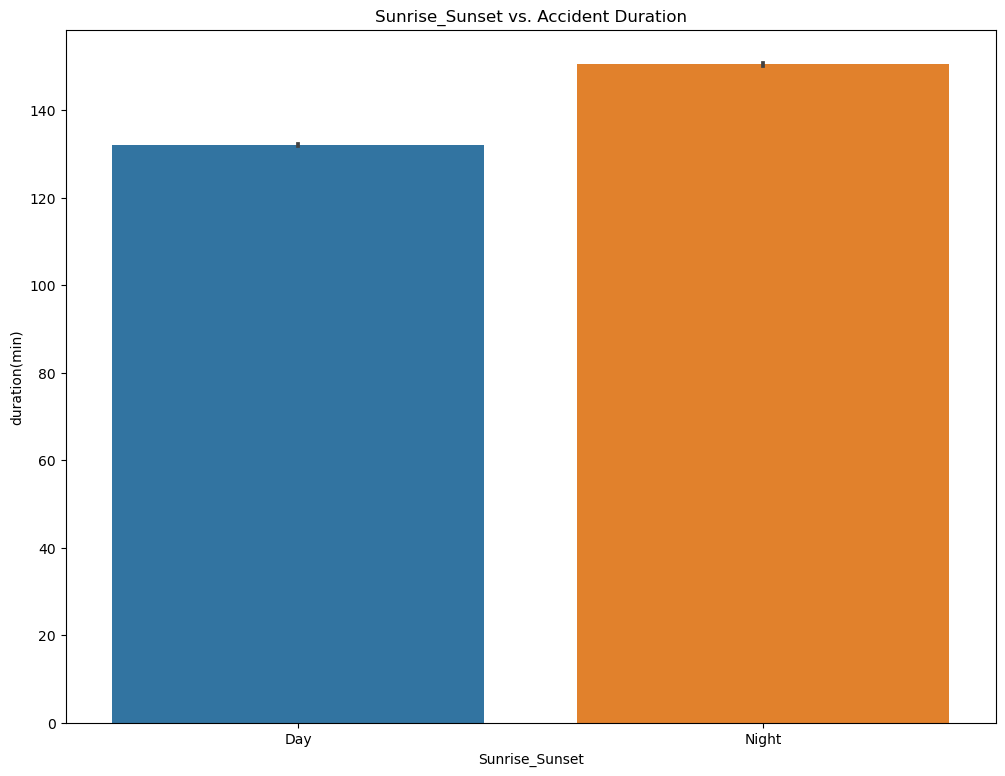

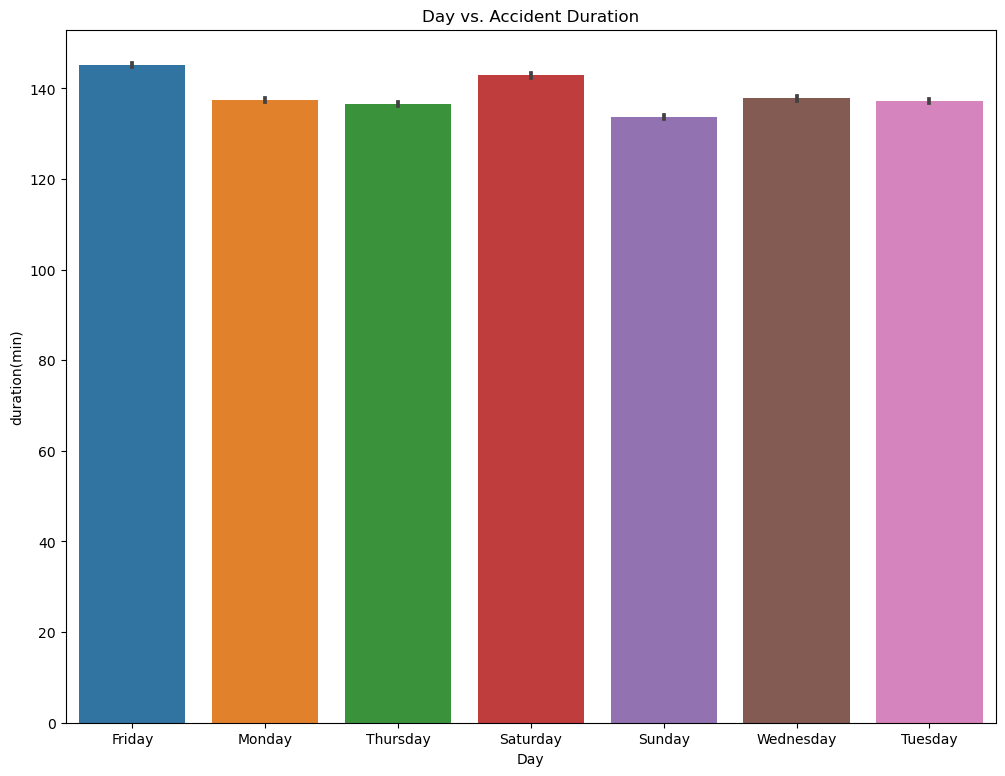

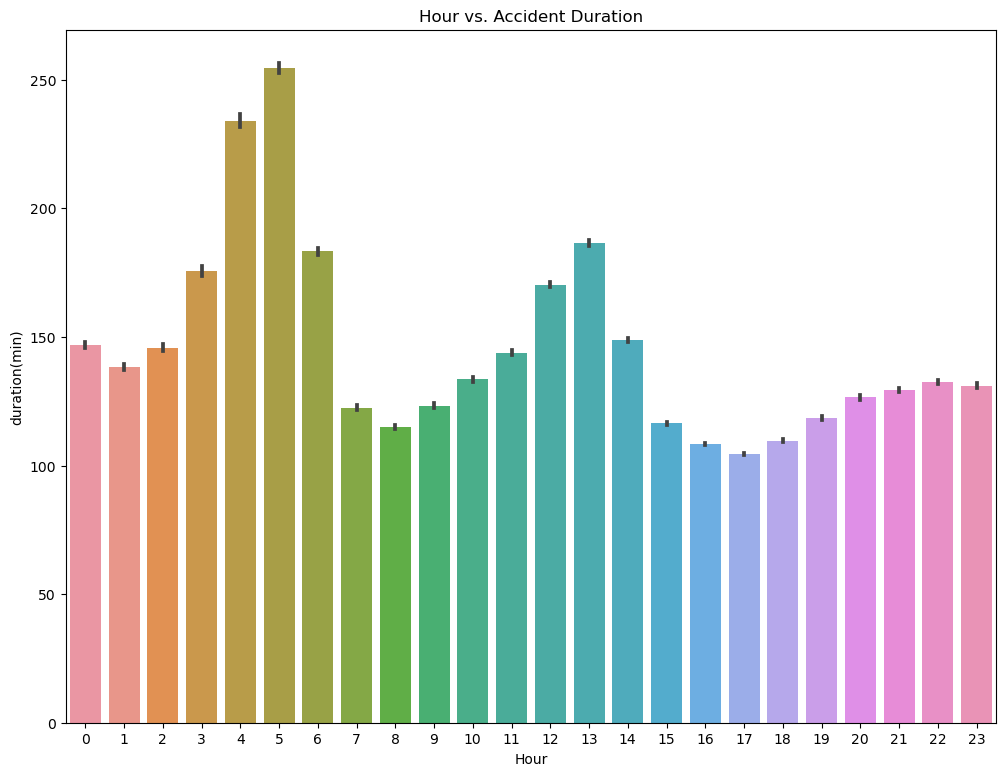

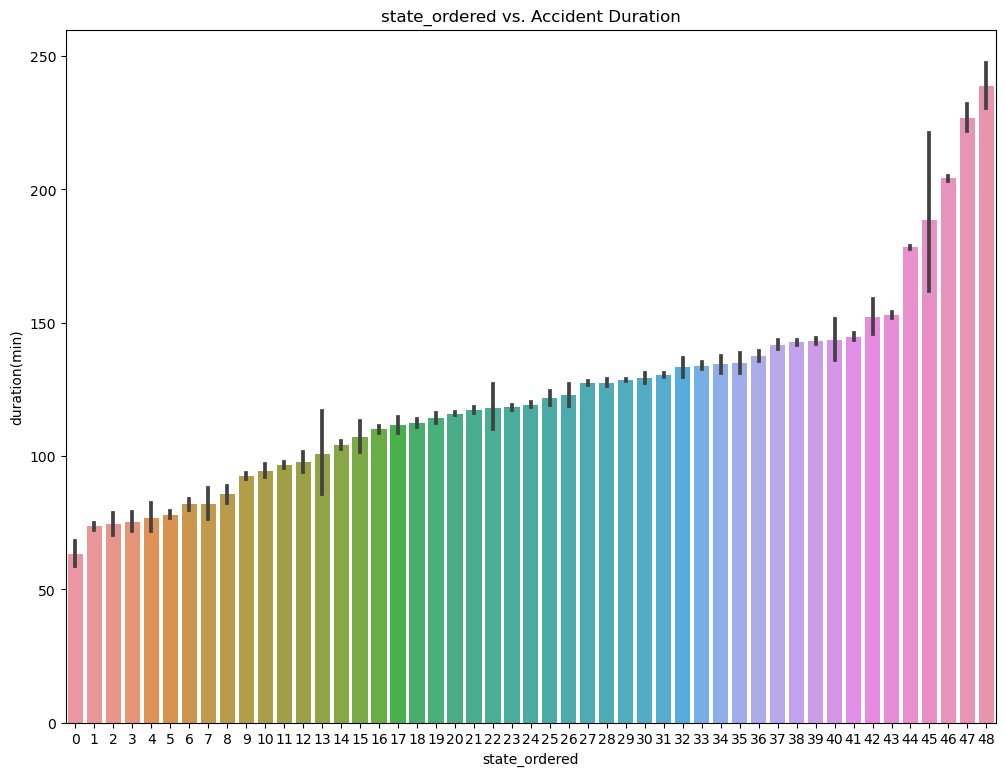

In [104]:
for feature in features:
    #bar plots for categoricals
    if df[feature].nunique() <= 50:
        sns.barplot(data=df, x=feature, y="duration(min)").set_title(feature + " vs. Accident Duration")
    #and scatters for continuous
    else:
        sns.scatterplot(data=df, x=feature, y="duration(min)", alpha=0.10).set_title(feature + " vs. Accident Duration")
    plt.savefig(('static/' + feature + '.png'),bbox_inches="tight")
    plt.show()

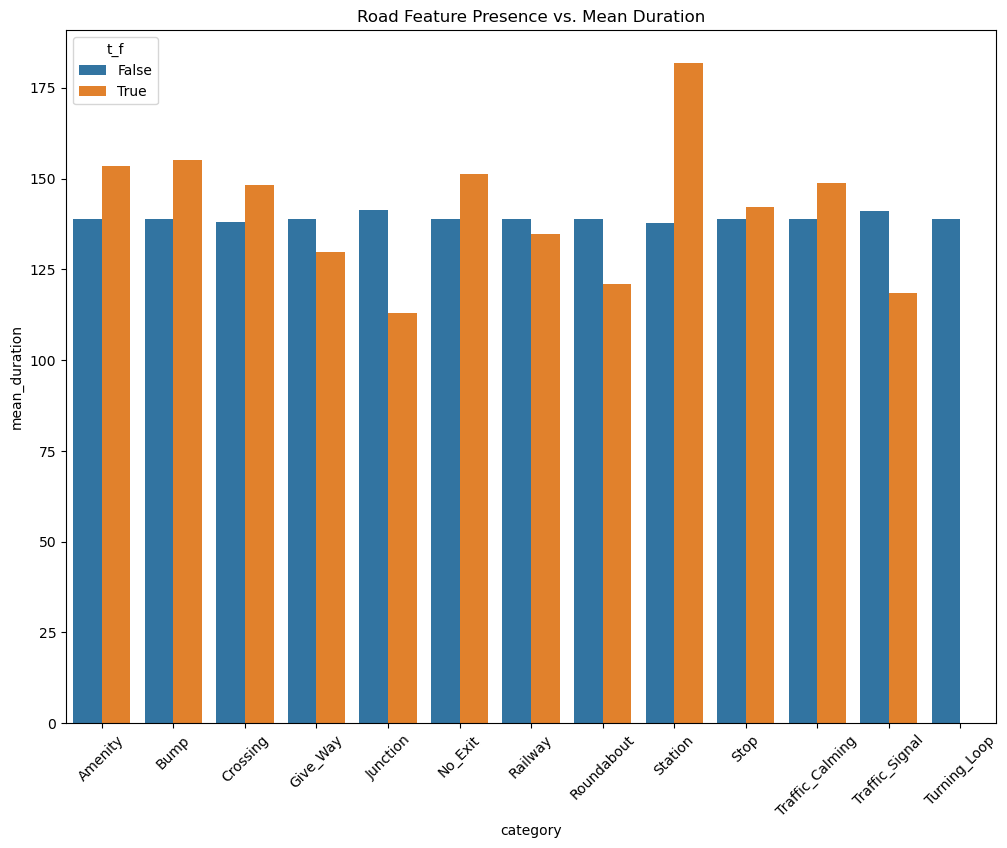

In [101]:
#plot the road feature categoricals all on one plot
cat_df = pd.DataFrame(columns=["category","t_f","mean_duration"])
for val in all_categoricals:
    for bool_val in [True, False]:
        entry = [val, bool_val, df[df[val] == bool_val]["duration(min)"].mean()]
        cat_df.loc[len(cat_df)] = entry
        

sns.barplot(data=cat_df, x="category", y="mean_duration", hue="t_f").set_title("Road Feature Presence vs. Mean Duration")
plt.xticks(rotation=45)
plt.savefig("static/road_features.png",bbox_inches="tight")

In [107]:
#drop Turning_Loop as all vals are false
df = df.drop(labels=["Turning_Loop"], axis=1)

In [108]:
#save cleaned data to csv
df.to_csv("cleaned_data.csv",index=False)

In [113]:
#export useful stuff for app
pd.Series(states_ordered).to_csv("states_ordered.csv")